In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn import decomposition

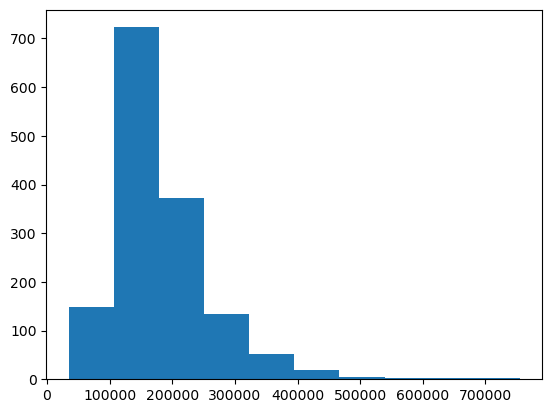

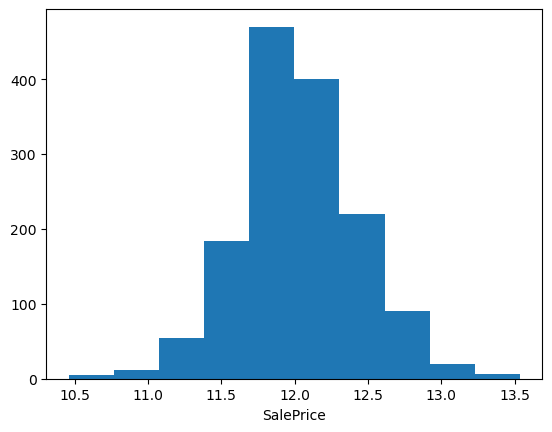

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


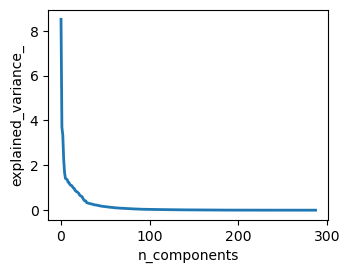

0.1453523813549781
Root mean square of Lasso regression 0.13753644007027632
Root mean square of rigde: 0.13943922552383609
Root mean square of Lasso regression 0.13753644007027632
Root mean square of Lasso regression 0.13753644007027632
Root mean square of rigde: 0.13943922552383609


SystemExit: 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
class App():
    def __init__(self, file_train, file_test): 
        # Loads the dataset.
        self._train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col=0)
        self._test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col=0)
         
        
    def _normalizeData(self, Numeric_columns):
    	# Function to normalize
        means = self._df.loc[:, Numeric_columns].mean()
        stdev = self._df.loc[:, Numeric_columns].std()
        self._df.loc[:, Numeric_columns] = (self._df.loc[:, Numeric_columns] - means) / stdev
        
        index_train = self._df.loc[self._train_df.index]
        index_test = self._df.loc[self._test_df.index]

        self._xTrain = index_train.values
        self._xTest = index_test.values
        
        self._df['LotArea'] = np.log(self._df['LotArea'])
        self._df['LotFrontage'] = np.log(self._df['LotFrontage'])


    
    def _removeSkewness(self):
        # Store target variable and remove skewness
        target = self._train_df['SalePrice']
        plt.hist(target)
        plt.show()
        del self._train_df['SalePrice']

        self._yTrain = np.log(target)
        plt.hist(self._yTrain)
        plt.xlabel('SalePrice')
        plt.show()
        
        
    
    def _dummyCreate(self):
       # Create dummy variables for the categorical features and handle the missing values
       self._df = pd.get_dummies(self._alldf)
       self._df.isnull().sum().sort_values(ascending=False)
       self._df = self._df.fillna( self._df.mean())


    """
    """
    def _pcaLassoRegr(self):
        pca = decomposition.PCA()
        pca.fit(self._xTrain)

        fig = plt.figure(1, figsize=(4, 3))

        plt.clf()
        plt.axes([.2, .2, .7, .7])
        plt.plot(pca.explained_variance_, linewidth=2)
        plt.axis('tight')
        plt.xlabel('n_components')
        plt.ylabel('explained_variance_')
        plt.show()
        
        train_pca = pca.transform(self._xTrain)
        test_pca = pca.transform(self._xTest)

        lassoregr = LassoCV(alphas=[0.1,0.001,0.0001,1,2,3,4,5,6,7,8,9,10,11,12]).fit(train_pca, self._yTrain)
        rmse= np.sqrt(-cross_val_score(lassoregr, train_pca, self._yTrain, scoring="neg_mean_squared_error", cv = 5)).mean()
        print(rmse)
        y_lasso = lassoregr.predict(self._xTest)
        
        return y_lasso
  
    
    """
    """
    def _lassoRegr(self):
        # Fitting the model and predicting using Lasso Regression
        lassoregr = LassoCV(alphas=[0.1,0.001,0.0001,1,2,3,4,5,6,7,8,9,10,11,12]).fit(self._xTrain, self._yTrain)
        y_lasso = lassoregr.predict(self._xTest)

        # Root mean squre with lasso regression
        rmse = np.sqrt(-cross_val_score(lassoregr, self._xTrain, self._yTrain, scoring="neg_mean_squared_error", cv = 5)).mean()
        print ("Root mean square of Lasso regression", rmse)
        
        return y_lasso
    
    
    """
    """
    def _ridgeRegr(self):
        # Fitting the model and predicting using Ridge Regression
        ridgeregr = RidgeCV(alphas=[0.1,0.001,0.0001,1,2,3,4,5,6,7,8,9,10,11,12]).fit(self._xTrain, self._yTrain)
        y_ridge = ridgeregr.predict(self._xTest)

        # Root mean squre with Ridge Regression
        ridgermse = np.sqrt(-cross_val_score(ridgeregr, self._xTrain, self._yTrain, scoring="neg_mean_squared_error", cv = 5)).mean()
        print ("Root mean square of rigde:",ridgermse)
        
        return y_ridge
    
    
    """
    """
    def _xboost(self):
        # Fitting the model and predicting using xgboost
        regr = xgb.XGBRegressor(colsample_bytree=0.4,
                gamma=0.045,
                learning_rate=0.07,
                max_depth=20,
                min_child_weight=1.5,
                n_estimators=300,
                reg_alpha=0.65,
                reg_lambda=0.45,
                subsample=0.95)

        regr.fit(self._xTrain, self._yTrain)
        y_pred_xgb = regr.predict(self._xTest)

        return  y_pred_xgb
        
         
    """
    """
    def _randomForest(self):
        rf = RandomForestRegressor(10, max_features='sqrt')
        rf.fit(self._xTrain, self._yTrain)
        y_rf = rf.predict(self._xTest)
        
    
    """
    """
    def _xboostLasso(self):
        y_pred_xgb = self._xboost()
        y_lasso = self._lassoRegr()
        
        # Combining the predictions
        y_final = (y_pred_xgb + y_lasso) / 2
        y_final = np.exp(y_final)
        
        return y_final
        
    
    """
    """
    def _xboostLassoRidge(self):
        y_pred_xgb = self._xboost()
        y_lasso = self._lassoRegr()
        y_ridge = self._ridgeRegr()
        
        # Combining the predictions
        y_final = (y_pred_xgb + y_lasso + y_ridge) / 3
        y_final = np.exp(y_final)

        return y_final
    
    
    """
    Please change submission file path below.
    """
    def _submission(self, y_final):
        # Preparing for submissions
        submission_df = pd.DataFrame(data= {'Id' : self._test_df.index, 'SalePrice': y_final})
        submission_df.to_csv('/kaggle/working/submisison.csv', index=False)
    
    

    def main(self):
    	# Remove skewness
        self._removeSkewness()
        
        # Concatenates the data
        self._alldf = pd.concat((self._train_df, self._test_df), axis=0)
        
        # Creates dummy variables
        self._dummyCreate()

        # Retrieve all numeric features
        numeric_columns = self._alldf.columns[self._alldf.dtypes != 'object']

        # Normalize the data set
        self._normalizeData(numeric_columns)
        
        # Using PCA and LassoReggression
        # Use this function and comment the functions below while running pca+lasso
        y_final = self._pcaLassoRegr()
        self._submission(y_final)
        
        # Using LassoReggression
        # Use this function and comment the remaining functions while running lasso
        y_final = self._lassoRegr()
        self._submission(y_final)

        # Using RidgeReggression
        # Use this function and comment the remaining functions while running ridge
        y_final = self._ridgeRegr()
        self._submission(y_final)

        # Using Xboost
        # Use this function and comment the remaining functions while running Xboost
        y_final = self._xboost()
        self._submission(y_final)

        # Using RandomForest
        # Use this function and comment the remaining functions while running RandomForest
        y_final = self._randomForest()
        self._submission(y_final)

        # Using XboostLasso
        # Use this function and comment the remaining functions while running XboostLasso
        y_final = self._xboostLasso()
        self._submission(y_final)

        # Using XboostLassoRidge
        # Use this function and comment the remaining functions while running XboostLassoRidge
        y_final = self._xboostLassoRidge()
        self._submission(y_final)



if __name__ == '__main__':
    app = App(sys.argv[1], sys.argv[2])
    sys.exit(app.main())
Footer
